INSTALLING pytorch, transformers, requests, beautifulsoup4 , pandas , numpy , matplotlib , seaborn

In [1]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
%pip install transformers requests beautifulsoup4 pandas numpy matplotlib seaborn 

Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.



Importing All The Modules

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import pandas as pd

Importing The BERT Pretrained Model

In [2]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

Scraping Reviews From imdb for Squid Game Season 2!

In [3]:
headers = ({
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/132.0.0.0 Safari/537.36","Accept-Language":"en-US, en;q=0.5"
})
response=requests.get("https://www.imdb.com/title/tt10919420/reviews/?ref_=tt_ov_ururv&spoilers=EXCLUDE",headers=headers)
soup=BeautifulSoup(response.content,"html.parser")
results=soup.find_all("div",class_="ipc-html-content-inner-div")
reviews=[result.get_text(strip=True) for result in results]
actual_results=soup.find_all("span",class_="ipc-rating-star--rating")
actual_reviews=[actual_result.get_text(strip=True) for actual_result in actual_results]

Creating the DataFrame with Pandas

In [ ]:
df = pd.DataFrame(list(zip(reviews, actual_reviews)), columns=['Reviews', 'Actual_Rating'])

Creating a Function Sentiment_score to pass all the scraped reviews through the model

In [11]:
def Sentiment_score(review):
    tokens=tokenizer.encode(review,return_tensors="pt")
    result=model(tokens)
    return int(torch.argmax(result.logits))+1

Calling The Function and implementing it on all the scraped reviews

In [12]:
df['Sentiment']=df['Reviews'].apply(lambda x: Sentiment_score(x))
df['Sentiment_1_to_10'] = df['Sentiment'] * 2
df.to_csv("Review Scores.csv")
df

,Reviews,Actual_Rating,Sentiment,Sentiment_1_to_10
0,"I found the show to be fantastic, only ruined ...",9,3,6
1,My God the actors who potrayed the VIP people ...,7,1,2
2,"Seriously. All things considered, they're a pr...",9,2,4
3,Just watched whole 9 episodes and my favorite ...,9,4,8
4,After hearing about all the hype and seeing it...,8,4,8
5,Comparisons to Season 1 are nonsensical. Seaso...,8,3,6
6,For someone who has seen Alice in Borderland a...,9,4,8
7,Squid Game. Wow.Korean.Best description? Uncom...,3,4,8
8,Squid Game Season 2 fails to live up to the th...,10,2,4
9,"Just binged the whole 9 episodes, best thing I...",10,5,10


Plotting The Graphs

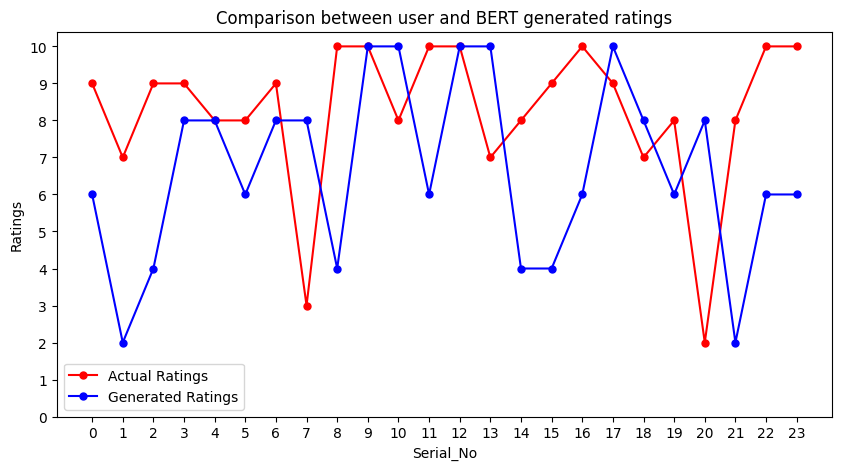

In [43]:
import matplotlib.pyplot as plt
import numpy as np
table=pd.read_csv('Review Scores.csv')
serial_no=list(range(24))
plt.figure(figsize=(10,5),dpi=100)
plt.plot(serial_no,table.Actual_Rating,color="red",label="Actual Ratings",marker=".",markersize="10")
plt.plot(serial_no,table.Sentiment_1_to_10, color="blue",label="Generated Ratings",marker=".",markersize="10")
plt.title("Comparison between user and BERT generated ratings")
plt.xlabel("Serial_No")
plt.ylabel("Ratings")
plt.xticks(range(24))
plt.yticks(range(11))
plt.legend()
plt.show()

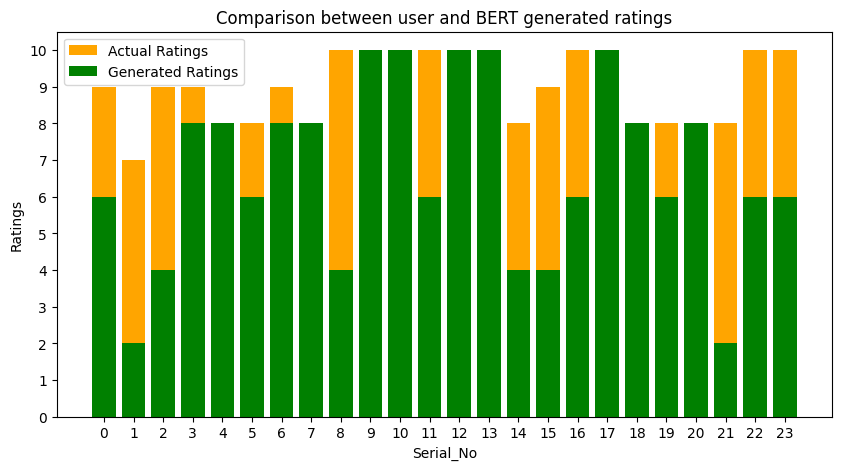

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
plt.bar(serial_no,table.Actual_Rating,color="Orange",label="Actual Ratings")
plt.bar(serial_no,table.Sentiment_1_to_10, color="Green",label="Generated Ratings")
plt.title("Comparison between user and BERT generated ratings")
plt.xlabel("Serial_No")
plt.ylabel("Ratings")
plt.xticks(range(24))
plt.yticks(range(11))
plt.legend() 
plt.show()

# Analysis of Sentiment Prediction vs. Actual IMDb Ratings:

The comparison between the predicted sentiment scores (1–10) and the actual IMDb ratings shows that in most cases, the predicted ratings closely align with the actual user ratings. This indicates that the BERT model effectively captures sentiment from the text.

However, there are some cases where discrepancies occur:

Inconsistent User Ratings:

Some user ratings do not match the sentiment expressed in their written reviews.
Example: A user gives a low rating (e.g., 3/10) but writes a positive review, causing the model to predict a higher sentiment score.

Sarcastic Reviews:

The model struggles with detecting sarcasm, often misinterpreting sarcastic negative reviews as positive.
Example: A review saying "Oh, what a masterpiece! Totally changed my life... (worst show ever)" might get a high sentiment score, even though the user meant it negatively.



# Conclusion & Insights
This project explored the application of BERT-based sentiment analysis on IMDb reviews, demonstrating the effectiveness of pretrained language models in understanding textual sentiment. The predicted sentiment scores (scaled from 1 to 10) were compared against actual IMDb user ratings, and the analysis revealed that in most cases, BERT successfully aligned with human sentiment.

However, some discrepancies were observed:

i.Inconsistent User Ratings – Some users provided written reviews that contradicted their numerical ratings, leading to mismatches in the predicted scores.
ii.Sarcasm Detection Issues – The model struggled with sarcastic and nuanced reviews, misinterpreting them as positive when they were intended to be negative.

Broader Implications in AI and NLP

The findings highlight both the strengths and limitations of current language models in real-world applications:

Strengths:

i.Pretrained LMs like BERT can efficiently analyze sentiment without retraining, making them ideal for quick sentiment classification.
ii. They generalize well to diverse reviews, showing promise in automated review analysis and customer feedback processing.

Limitations & Areas for Improvement:

i.Contextual nuances (like sarcasm, irony, or mixed sentiments) are still challenging.
ii.Fine-tuning on domain-specific datasets (e.g., IMDb movie reviews) or integrating sarcasm detection techniques could improve accuracy.
Incorporating explainability techniques (e.g., attention visualization) would help understand how BERT makes its decisions.